In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt #import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
from ipynb.fs.full.random_forest_api import random_forest_algorithm,random_forest_predictions

In [2]:
train_data = pd.read_csv(r'/Users/vidhanjain/desktop/Jupiter/Loan Prediction/train.csv')
test_data = pd.read_csv(r'/Users/vidhanjain/desktop/Jupiter/Loan Prediction/test.csv')
combine = [train_data,test_data]
train_data.shape

(614, 13)

In [3]:
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
combine = [train_data, test_data]

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Credit_History > Self_Employed > LoanAmount > Dependents > Loan_Amount_Term > Gender > Married has null values.

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### Data Distribution For Numerical Features

In [8]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Fill Null values in LoanAmount, Loan_Amount_Term and Credit_History.<br>
Almost 75% Applicants has monthly income <=5795.00<br>
45% Coapplicants have no income.<br>


### Data Distribution For Categorical Features

In [9]:
train_data.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002116,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Loan_ID has all unique values so it doesn't contribute in model training. We'll drop it.<br>
We'll fill null values in Gender, Married, Self_Employed and Dependents.<br>
79% who applied are male (489/614).<br>
64% who applied are married.<br>
78% who applied were graduates.<br>
81% are not self-employed.<br>
56% people are Independent.<br>
Around 69% people got the loan.<br>

### Data Analysis

In [10]:
train_data['Loan_Status'] = train_data['Loan_Status'].map({'Y':1,'N':0})

In [11]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [12]:
train_data[['Education','Loan_Status']].groupby(['Education'], as_index=False).mean().sort_values(['Loan_Status'],ascending=False)

,Education,Loan_Status
0,Graduate,0.708333
1,Not Graduate,0.611940


Observation: Graduate applicant has more chances of getting loan approved then un-graduate applicant.

In [13]:
train_data[['Property_Area','Loan_Status']].groupby(['Property_Area'], as_index=False).mean().sort_values(['Loan_Status'],ascending=False)

,Property_Area,Loan_Status
1,Semiurban,0.768240
2,Urban,0.658416
0,Rural,0.614525


Observation: Semiurban property area has highest loan approval status of around 77% and Rural property area has least approval status of around 61%.

In [14]:
train_data[['Gender','Loan_Status']].groupby(['Gender'], as_index=False).mean().sort_values(['Loan_Status'],ascending=False)

,Gender,Loan_Status
1,Male,0.693252
0,Female,0.669643


Observation: Loan Status for gender is approximately same for both male and female. It may not directly contribute to our classification but may help in feature engineering

In [15]:
train_data[['Married','Loan_Status']].groupby(['Married'], as_index=False).mean().sort_values(['Loan_Status'],ascending=False)

,Married,Loan_Status
1,Yes,0.716080
0,No,0.629108


Observation: Married person has more Loan approvals then unmarried man.

In [16]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
train_data[['Self_Employed','Loan_Status']].groupby(['Self_Employed'], as_index=False).mean().sort_values(['Loan_Status'],ascending=False)

,Self_Employed,Loan_Status
0,No,0.686000
1,Yes,0.682927


Observation: Loan Status is same either person is self employed or not. It directly doesn't contribute to the classification.

In [18]:
train_data[['Dependents','Loan_Status']].groupby(['Dependents'], as_index=False).mean().sort_values(['Loan_Status'],ascending=False)

,Dependents,Loan_Status
2,2,0.752475
0,0,0.689855
1,1,0.647059
3,3+,0.647059


Obsrvation: Applicants having exactly 2 dependents have highest loan approval status (75%).

In [19]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Observation: Most people are not self-employed

In [20]:
train_data[['Credit_History','Loan_Status']].groupby(['Credit_History'], as_index=False).mean().sort_values(['Loan_Status'],ascending=False)

,Credit_History,Loan_Status
1,1.0,0.795789
0,0.0,0.078652


Observation: Applicant having credit history has loan approvals of 79%. Applicant having no credit history has loan approval of 7%.

In [21]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Observation: Most people (around 83% have Loan Amount term = 360). Loan_Amount_Term has less unique values, so it can used as catagorical variable.

In [22]:
train_data[['Loan_Amount_Term','Loan_Status']].groupby(['Loan_Amount_Term'], as_index=False).mean().sort_values(['Loan_Status'],ascending=False)

,Loan_Amount_Term,Loan_Status
0,12.0,1.000000
2,60.0,1.000000
4,120.0,1.000000
3,84.0,0.750000
6,240.0,0.750000
8,360.0,0.701172
5,180.0,0.659091
7,300.0,0.615385
9,480.0,0.400000
1,36.0,0.000000


In [23]:
train_data[['Loan_Amount_Term','Loan_Status']].groupby([train_data['Loan_Amount_Term'] == 360.0], as_index=False).mean().sort_values(['Loan_Status'],ascending=False)

,Loan_Amount_Term,Loan_Status
1,360.000000,0.701172
0,237.272727,0.617647


Observation: Loan Amount Term can be feature engineered and converted into feature having loan term 360 or not 360.

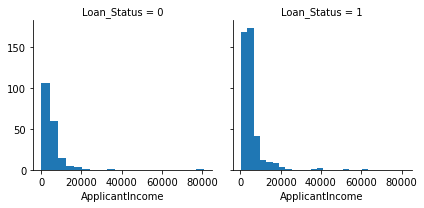

In [24]:
g = sns.FacetGrid(train_data, col='Loan_Status')
g.map(plt.hist, 'ApplicantIncome', bins=20)

Observation: Maximum applicant income is b/w (0 - 20,000).

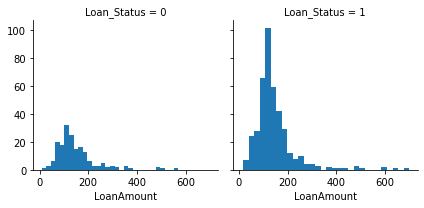

In [25]:
g = sns.FacetGrid(train_data, col='Loan_Status')
g.map(plt.hist, 'LoanAmount', bins=30)

/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


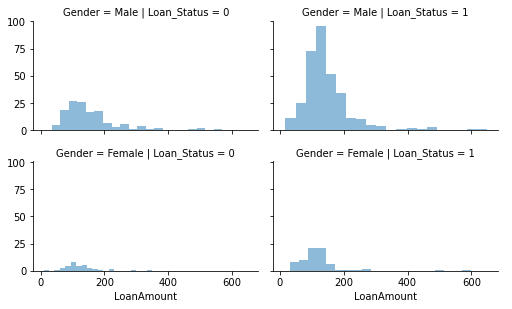

In [26]:
grid = sns.FacetGrid(train_data, col='Loan_Status', row='Gender', size=2.2, aspect=1.6)
grid.map(plt.hist, 'LoanAmount', alpha=.5, bins=20)
grid.add_legend();

/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


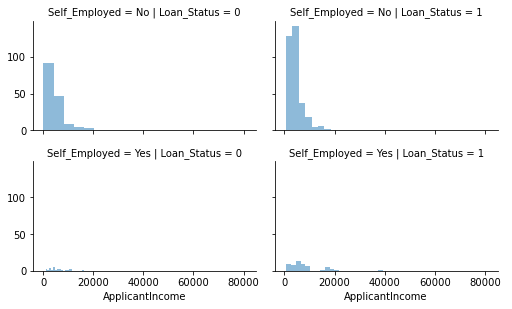

In [27]:
grid = sns.FacetGrid(train_data, col='Loan_Status', row='Self_Employed', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=20)
grid.add_legend();

/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


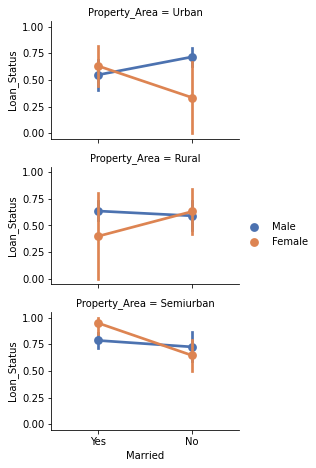

In [28]:
grid = sns.FacetGrid(train_data, row='Property_Area', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Married', 'Loan_Status', 'Gender', palette='deep')
grid.add_legend()

Observation: Married Women in Semiurban and Urban areas have more approved Loan Status than married man. But, unmarried man in Semiurban and urban areas have more approved loan status than unmarried women.

### Wrangle Data

In [29]:
for dataset in combine:
    dataset['Education'] = dataset['Education'].map({'Graduate':1,'Not Graduate':0})
    dataset['Property_Area'] = dataset['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})

In [30]:
LA_medians = np.zeros([2,3])
for dataset in combine:
    for i in range(len(dataset['Education'].unique())):
        for j in range(len(dataset['Property_Area'].unique())):
            guess_LA = dataset[(dataset['Education'] == i) & (dataset['Property_Area'] == j)]['LoanAmount'].dropna()

            LA_median = guess_LA.median()
            LA_medians[i,j] = int( LA_median/0.5 + 0.5 ) * 0.5
            
    for i in range(len(dataset['Education'].unique())):
        for j in range(len(dataset['Property_Area'].unique())):
            dataset.loc[ (dataset['LoanAmount'].isnull()) & (dataset['Education'] == i) & (dataset['Property_Area'] == j), 'LoanAmount'] = LA_medians[i,j]

In [31]:
LAT_medians = np.zeros([2,3])
for dataset in combine:
    for i in range(len(dataset['Education'].unique())):
        for j in range(len(dataset['Property_Area'].unique())):
            guess_LAT = dataset[(dataset['Education'] == i) & (dataset['Property_Area'] == j)]['Loan_Amount_Term'].dropna()

            LAT_median = guess_LAT.median()
            LAT_medians[i,j] = int( LAT_median/0.5 + 0.5 ) * 0.5
            
    for i in range(len(dataset['Education'].unique())):
        for j in range(len(dataset['Property_Area'].unique())):
            dataset.loc[ (dataset['Loan_Amount_Term'].isnull()) & (dataset['Education'] == i) & (dataset['Property_Area'] == j), 'Loan_Amount_Term'] = LAT_medians[i,j]

In [32]:
CH_freq = train_data['Credit_History'].mode()[0]
for dataset in combine:
    dataset['Credit_History'] = dataset['Credit_History'].fillna(CH_freq)

In [33]:
married_freq = train_data['Married'].mode()[0]
for dataset in combine:
    dataset['Married'] = dataset['Married'].fillna(married_freq)

In [34]:
gender_freq = train_data.loc[(train_data['Married'] == 'Yes') & (train_data['Self_Employed'] == 'No'), 'Gender'].mode()[0]
for dataset in combine:
    dataset['Gender'] = dataset['Gender'].fillna(gender_freq)

In [35]:
dependents_freq = train_data.loc[(train_data['Education'] == 1) & (train_data['Married'] == 'Yes') & (train_data['Gender'] == 'Male') & (train_data['Self_Employed'] == 'No'), 'Dependents'].mode()[0]
for dataset in combine:
    dataset['Dependents'] = dataset['Dependents'].fillna(dependents_freq)

In [36]:
for dataset in combine:
    dataset['Self_Employed'] = dataset['Self_Employed'].fillna('No')

In [37]:
train_data.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Self_Employed
count,614,614,614,614,614
unique,614,2,2,4,2
top,LP002116,Male,Yes,0,No
freq,1,502,401,360,532


In [38]:
train_data = train_data.drop(['Loan_ID'],axis=1)
test_data = test_data.drop(['Loan_ID'], axis=1)
combine = [train_data,test_data]

In [39]:
for dataset in combine:
    dataset['Gender'] = dataset['Gender'].map({'Male':1,'Femal':0})
    dataset['Married'] = dataset['Married'].map({'Yes':1,'No':0})
    dataset['Self_Employed'] = dataset['Self_Employed'].map({'No':0,'Yes':1})
    dataset['Dependents'] = dataset['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

## Random Forest Algorithm

In [40]:
forest = random_forest_algorithm(train_data,n_trees=8,n_bootstrap=450,n_features=8,dt_max_depth=8)

In [41]:
predictions = random_forest_predictions(test_data,forest)

In [42]:
predictions.value_counts()

1.0    293
0.0     74
Name: 0, dtype: int64